In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/companydataset/1000_Companies.csv
/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# 'Wine Quality' Dataset

The dataset "Red Wine Quality" is a dataset used for regression analysis and predictive modeling tasks. It focuses on the quality of red wines based on various physicochemical properties. However for this regression analysis I will change the target variable from quality to the density of the red wines. Therefore the goal of the analysis is to understand how each of the physiochemial properties affects the overall density. 

# Simple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
wq = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

# Normalize Dataframe WQ
wine_quality = wq.drop(columns=['quality'])
meann = wine_quality.drop(columns=['density']).mean()
stdd = wine_quality.drop(columns=['density']).std()
wine_quality = (wine_quality.drop(columns=['density']) - meann) / stdd
wine_quality['density'] = wq['density']

#Add a bias term to the dataframe
wine_quality['Ones'] = np.ones(len(wine_quality)) 

Epochs and Costs:
Epoch: 0, Cost: 0.4023707933822994
Epoch: 200, Cost: 1.341699326457353e-06
Epoch: 400, Cost: 1.3416993264571533e-06
Epoch: 600, Cost: 1.3416993264571533e-06
Epoch: 800, Cost: 1.3416993264571533e-06
Epoch: 1000, Cost: 1.3416993264571533e-06
Epoch: 1200, Cost: 1.3416993264571533e-06
Epoch: 1400, Cost: 1.3416993264571533e-06
Epoch: 1600, Cost: 1.3416993264571533e-06
Epoch: 1800, Cost: 1.3416993264571533e-06
Final values:
Final w: -0.0009364569275869542, Final b: 0.9967466791744836


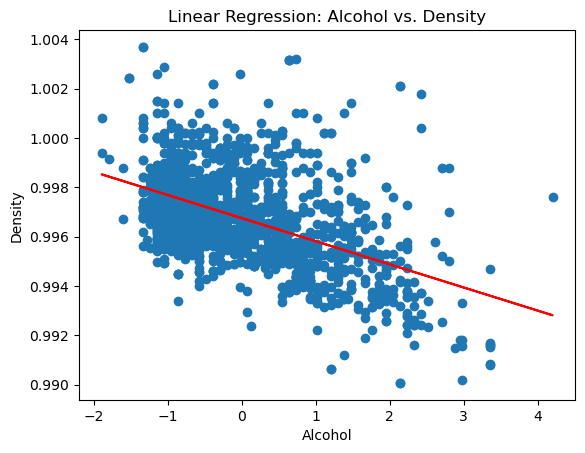

In [3]:

# Single variable linear regression functions
def single_cost(x, y, w_in, b_in):
    m = x.shape[0]
    total_cost = 0
    
    for i in range(m):
        f_x = w_in * x.iloc[i] + b_in
        cost = (f_x - y.iloc[i])**2
        total_cost += cost
        
    return total_cost / (2 * m)

def single_grad(x, y, w_in, b_in, L):
    w_g = 0
    b_g = 0
    m = x.shape[0]
    
    for i in range(m):
        w_g += (1 / m) * (w_in * x.iloc[i] + b_in - y.iloc[i]) * x.iloc[i]
        b_g += (1 / m) * (w_in * x.iloc[i] + b_in - y.iloc[i])
    
    w = w_in - L * w_g
    b = b_in - L * b_g
    
    return w, b

# Initialize variables
w = 0
b = 0
L = 0.1
epoch = 2000
print_epochs = []
print_costs = []
cost_hist = []

# Training loop
for i in range(epoch):
    w, b = single_grad(wine_quality['alcohol'], wine_quality['density'], w, b, L)
    
    if i % 200 == 0:
        print_epochs.append(i)
        cost = single_cost(wine_quality['alcohol'], wine_quality['density'], w, b)
        print_costs.append(cost)
    
    cost = single_cost(wine_quality['alcohol'], wine_quality['density'], w, b)
    cost_hist.append(cost)

# Print results
print("Epochs and Costs:")
for epoch, cost in zip(print_epochs, print_costs):
    print(f"Epoch: {epoch}, Cost: {cost}")

print("Final values:")
print(f"Final w: {w}, Final b: {b}")

# Plot the regression line
x_val = wine_quality['alcohol']
pred_y = w * x_val + b

plt.scatter(x_val, wine_quality['density'])
plt.plot(x_val, pred_y, color="red")
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.title('Linear Regression: Alcohol vs. Density')
plt.show()


The code essentially performs single-variable linear regression on the "Red Wine Quality" dataset, aiming to predict the density of wine based on its alcohol content. It uses gradient descent to optimize the slope and intercept of the regression line and visualizes the result by plotting the regression line over the scatter plot of the original data points. The code iteratively refines the regression line to minimize the cost (mean squared error) between predicted and actual density values.

# Multiple Linear Regression

In [4]:
#Convert to np arrays
x_features = wine_quality.drop(columns = ['density']).values
y_features = wine_quality['density'].values

# Reshape x_features and y_features to column vectors
x_features = x_features.reshape(-1, x_features.shape[1])
y_features = y_features.reshape(-1, 1)


In [5]:
# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x_features, y_features, test_size=0.3, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

print("\nValidation set shapes:")
print("x_validation:", x_validation.shape)
print("y_validation:", y_validation.shape)

print("\nTest set shapes:")
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
x_train: (1119, 11)
y_train: (1119, 1)

Validation set shapes:
x_validation: (240, 11)
y_validation: (240, 1)

Test set shapes:
x_test: (240, 11)
y_test: (240, 1)


In [6]:
# Compute cost and add L2 regularization
def mult_cost_reg(x, y, w_a, b_a, Lam):
    m = x.shape[0]
    f_c = np.dot(x, w_a) + b_a
    cost = np.sum((f_c - y)**2)
    
    reg_term = (Lam / (2 * m)) * np.sum(w_a**2)
    
    total_cost = (cost + reg_term) / (2 * m)
    return total_cost
    
    
def mult_grad_reg(x, y, w_in, b_in, L,Lam):
    m = x.shape[0]  # Calculate the number of samples
    f_p = np.dot(x, w_in) + b_in
    
    reg_term = (Lam/m) * w_in
    w_g = (1 / m) * np.dot(x.T, f_p - y) + reg_term  # Calculate the gradient using 
    #the transposed x_train and add the reg term to the parital der
    b_g = (1 / m) * np.sum(f_p - y)
    
    w = (w_in - L * w_g)
    b = b_in - L * b_g
    
    return w, b

# Optimizing Learning Rate and Lambda using the Validation Set

In [7]:
# Define the hyperparameter grid
L_values = [0.001, 0.01, 0.1, 1]
Lam_values = [0.001, 0.01, 0.1, 1, 10, 50]

# Initialize variables
w = np.zeros((x_train.shape[1], 1))  # Initialize w with the correct shape
b = 0
epoch = 2000

# Initialize lists to store the results
best_L = None
best_Lam = None
best_cost = float('inf')

# Perform the grid search
for L in L_values:
    for Lam in Lam_values:
        # Reset the weights and bias
        w.fill(0)
        b = 0
        
        # Training loop
        for i in range(epoch):
            w, b = mult_grad_reg(x_train, y_train, w, b, L, Lam)
        
        # Calculate the cost on the validation set (the Lam and L values are calculated
        #using train/test but evaluated using the validation set to avoid overfitting)
        
        cost = mult_cost_reg(x_validation, y_validation, w, b, Lam)
        
        # Update the best hyperparameters if necessary
        if cost < best_cost:
            best_L = L
            best_Lam = Lam
            best_cost = cost

# Print the best hyperparameters
print(f"Best L: {best_L}, Best Lam: {best_Lam}")

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Best L: 0.1, Best Lam: 0.001


In [8]:
# Initialize variables
w = np.zeros((x_train.shape[1], 1))  # Initialize w with the correct shape
b = 0
L = 0.1
Lam = 0.001
epoch = 2000
print_epochs = []
print_costs = []
cost_hist = []

# Training loop

for i in range(epoch):
    w, b = mult_grad_reg(x_train, y_train, w, b, L,Lam)
    
    if i % 200 == 0:
        print_epochs.append(i)
        cost = mult_cost_reg(x_train, y_train, w, b,Lam)
        print_costs.append(cost)
    
    cost = mult_cost_reg(x_train, y_train, w, b,Lam)
    cost_hist.append(cost)

# Print results
print("Epochs and Costs:")
for epoch, cost in zip(print_epochs, print_costs):
    print(f"Epoch: {epoch}, Cost: {cost}")

print("Final values:")
print(f"Final w: {w}, Final b: {b}")

Epochs and Costs:
Epoch: 0, Cost: 0.3178200100346666
Epoch: 200, Cost: 2.869641258594043e-07
Epoch: 400, Cost: 2.86690707412115e-07
Epoch: 600, Cost: 2.866902609789966e-07
Epoch: 800, Cost: 2.866902592350733e-07
Epoch: 1000, Cost: 2.8669025834294524e-07
Epoch: 1200, Cost: 2.8669025745607887e-07
Epoch: 1400, Cost: 2.866902565693968e-07
Epoch: 1600, Cost: 2.866902556827356e-07
Epoch: 1800, Cost: 2.8669025479609e-07
Final values:
Final w: [[ 1.60052546e-03]
 [ 1.12443515e-04]
 [ 2.01714875e-05]
 [ 6.04282659e-04]
 [ 6.38666884e-05]
 [-1.04371114e-04]
 [ 7.60310210e-05]
 [ 7.71375271e-04]
 [ 2.30366230e-04]
 [-9.72936844e-04]
 [ 4.98333990e-01]], Final b: 0.49842283815828


Explaining the loop to myself:

Initially w and b are 0. The w and b partial derivatives are calculated and the w and b values are altered and returned. Since for i in range(epoch): runs the loop again and again, in the next iteration the w and b are not 0 but altered and so on. Hence w and b are optimized and so is cost as a result. The difference is the loop is outside the grad desc function but the update is not. 

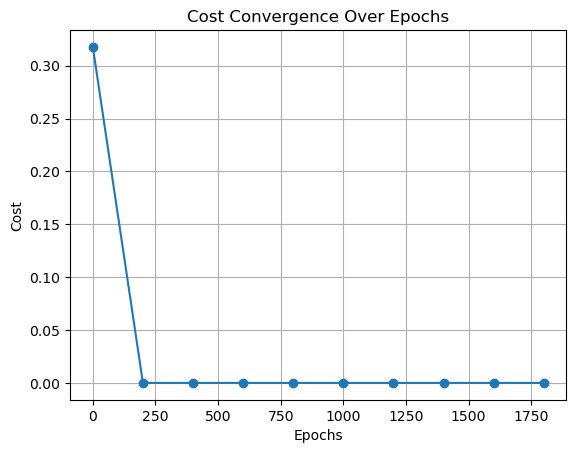

In [9]:
#Visualizing the decrease in Cost
plt.plot(print_epochs, print_costs, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Convergence Over Epochs')
plt.grid()
plt.show()

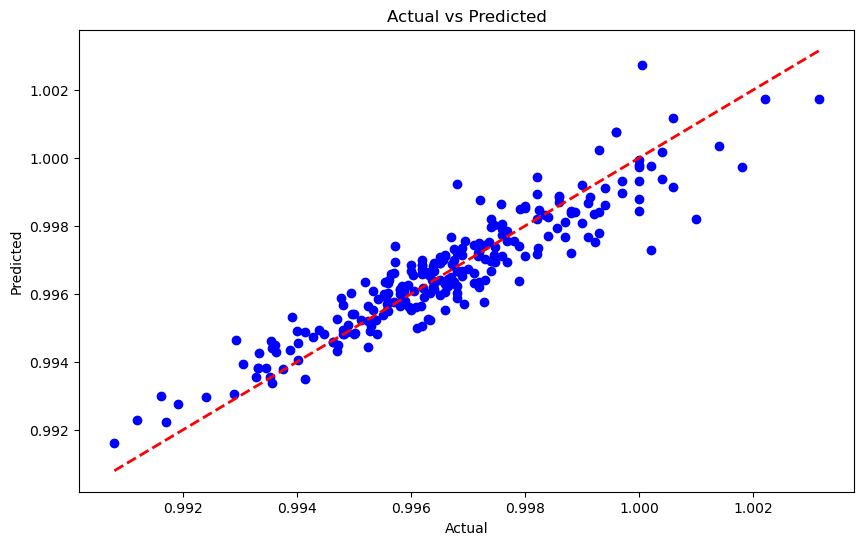

In [10]:
# Step 1: Make Predictions
predictions1 = np.dot(x_test, w) + b

# Step 2: Compare Predictions
comparison_df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions1.flatten()})

# Step 3: Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(comparison_df1['Actual'], comparison_df1['Predicted'], color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In this analysis, a linear regression model with L2 regularization is being implemented on the "Red Wine Quality" dataset. The primary goal is to predict density values using features from the dataset. The dataset is loaded and preprocessed by normalizing the features and adding a bias term (ones) to aid in training. Subsequently, the data is divided into training, testing, and validation sets.

The cost and gradient descent functions contain regularization, which resolves overfitting by adding a penalty term based on the squared magnitude of the weights. To optimize the model, a grid search is conducted, evaluating combinations of learning rates (L) and regularization strengths (Lam) to identify values that minimize the cost on the validation set.

For the final step, a visual representation of the results is generated using a scatter plot. This plot displays the model's predicted density values against the actual values from the dataset. A red dashed line on the plot depicts perfect alignment between predictions and actual values. Deviations of the blue scatter points from this line highlight discrepancies for individual samples. Overall, the model creates acceptable predictions which are neither over-fitted nor under-fitted

In summary, this analysis highlights the implementation of regularized linear regression. The process encompasses data preprocessing, hyperparameter tuning, and visualization techniques. 